**Que 1: How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

To perform a matrix multiplication between a (n, k) matrix and a (k, m) matrix, we need:

Multiplications: n * k * m

Additions: n * m * (k - 1)

Let's break this down:

Multiplications:

The resulting matrix will be of size (n, m).

For each element in this result matrix, we need to multiply k pairs of numbers.

There are n * m elements in the result matrix.

So, the total number of multiplications is n * m * k.


Additions:

For each element in the result matrix, we need to sum k products.

Summing k numbers requires (k - 1) additions.

We do this for all n * m elements of the result matrix.

So, the total number of additions is n * m * (k - 1).


**Que 2: Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [5]:
import numpy as np
import time

def matrix_multiply(A, B):
    n, k = len(A), len(A[0])
    k, m = len(B), len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]

    return C

n, k, m = 100, 100, 100
A = [[np.random.rand() for _ in range(k)] for _ in range(n)]
B = [[np.random.rand() for _ in range(m)] for _ in range(k)]

# List of lists approach
start_time = time.time()
C_list = matrix_multiply(A, B)
list_time = time.time() - start_time
print(f"List of lists time: {list_time:.6f} seconds")

# NumPy approach
A_np = np.array(A)
B_np = np.array(B)

start_time = time.time()
C_np = np.dot(A_np, B_np)
numpy_time = time.time() - start_time
print(f"NumPy time: {numpy_time:.6f} seconds")

print(f"NumPy is {list_time / numpy_time:.2f} times faster")


List of lists time: 0.192905 seconds
NumPy time: 0.002334 seconds
NumPy is 82.65 times faster


List of lists calculates matrix elements sequentially, one at a time. NumPy uses Vectorization which uses SIMD(Single Instruction Multiple Data) technique to process multiple elements simultaneously in one CPU cycle. This parallel approach allows NumPy to operate on entire rows or columns at once, significantly speeding up matrix multiplication, especially for larger matrices.

**Que 3: Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Time complexity of the naive method: To find the median, we'd need to find the (n/2)th highest element in an array of n elements. Using the method described, this would require n/2 passes over the array. Each pass is O(n), so the total time complexity would be O(n^2).

A better method: We can use the **QuickSelect algorithm**, which has an average time complexity of O(n).

Lets implement both of the methods and compare it with the numpy.median

In [14]:
import random

def traditional_median(arr):
    n = len(arr)
    for i in range(n // 2):
        max_idx = i
        for j in range(i + 1, n):
            if arr[j] > arr[max_idx]:
                max_idx = j
        arr[i], arr[max_idx] = arr[max_idx], arr[i]
    return arr[n // 2]

def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    if k < len(left):
        return quickselect(left, k)
    elif k < len(left) + len(middle):
        return pivot
    else:
        return quickselect(right, k - len(left) - len(middle))

def quickselect_median(arr):
    if len(arr) % 2 == 1:
        return quickselect(arr, len(arr) // 2)
    else:
        left = quickselect(arr, len(arr) // 2 - 1)
        right = quickselect(arr, len(arr) // 2)
        return (left + right) / 2



size = 10000
arr = np.random.rand(size)

start = time.time()
naive_result = traditional_median(arr.copy())
naive_time = time.time() - start

start = time.time()
quickselect_result = quickselect_median(arr.tolist())
quickselect_time = time.time() - start

start = time.time()
numpy_result = np.median(arr)
numpy_time = time.time() - start

print(f"Traditional method time: {naive_time:.6f} seconds")
print(f"QuickSelect time: {quickselect_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")



Traditional method time: 11.587463 seconds
QuickSelect time: 0.011579 seconds
NumPy time: 0.000636 seconds


Above code implements the traditional method, the QuickSelect algorithm, and compares them with numpy.median. Here's what you might observe:

The traditional method will be significantly slower, especially for larger arrays, due to its O(n^2) time complexity.

The QuickSelect method will be much faster than the naive method, with performance closer to numpy.median.

numpy.median will likely be the fastest, especially for larger arrays, due to its optimized C implementation

**Que 4: What is the gradient of the following function with respect to x and y?**

 f(x, y) = x²y + y³sin(x)


The gradient will have two components: ∂f/∂x and ∂f/∂y.

Partial derivative with respect to x (∂f/∂x):

∂f/∂x = 2xy + y³cos(x)

Partial derivative with respect to y (∂f/∂y):

∂f/∂y = x² + 3y²sin(x)

The gradient is the vector of these partial derivatives:

∇f = (∂f/∂x, ∂f/∂y) = (2xy + y³cos(x), x² + 3y²sin(x))


**Que 5: Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y?**

In [18]:
import jax.numpy as jnp
from jax import grad, vmap
import numpy as np


def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def gradient_f(x, y):
    df_dx = 2*x*y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

grad_f_x = grad(f, argnums=0)
grad_f_y = grad(f, argnums=1)

def jax_gradient_f(x, y):
    return jnp.array([grad_f_x(x, y), grad_f_y(x, y)])

np.random.seed(0)
num_points = 5
x_vals = np.random.rand(num_points) * 10
y_vals = np.random.rand(num_points) * 10

v_gradient_f = vmap(gradient_f, in_axes=(0, 0))
v_jax_gradient_f = vmap(jax_gradient_f, in_axes=(0, 0))

analytical_grads = v_gradient_f(x_vals, y_vals)
jax_grads = v_jax_gradient_f(x_vals, y_vals)

# Compare results
print("Random (x, y) points:")
for x, y in zip(x_vals, y_vals):
    print(f"({x:.4f}, {y:.4f})")

print("\nAnalytical Gradients:")
print(analytical_grads)

print("\nJAX Gradients:")
print(jax_grads)


Random (x, y) points:
(5.4881, 6.4589)
(7.1519, 4.3759)
(6.0276, 8.9177)
(5.4488, 9.6366)
(4.2365, 3.8344)

Analytical Gradients:
[[ 259.57962   -59.227512]
 [ 116.70445    95.0084  ]
 [ 793.6646    -23.975124]
 [ 706.08344  -176.70984 ]
 [   6.664112  -21.259804]]

JAX Gradients:
[[ 259.57962   -59.227512]
 [ 116.70445    95.0084  ]
 [ 793.6646    -23.975124]
 [ 706.08344  -176.70984 ]
 [   6.664112  -21.259804]]


**Que 6: Use sympy to confirm that you obtain the same gradient analytically.**

In [23]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

gradient = [sp.diff(f, var) for var in (x, y)]

print("Symbolic gradient:")
print(f"∂f/∂x = {gradient[0]}")
print(f"∂f/∂y = {gradient[1]}")

manual_gradient = [
    2*x*y + y**3 * sp.cos(x),
    x**2 + 3 * y**2 * sp.sin(x)
]

print("\nManually calculated gradient:")
print(f"∂f/∂x = {manual_gradient[0]}")
print(f"∂f/∂y = {manual_gradient[1]}")

are_equal = all(sp.simplify(g1 - g2) == 0 for g1, g2 in zip(gradient, manual_gradient))

print(f"\nAre the gradients equivalent? {are_equal}")



Symbolic gradient:
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)

Manually calculated gradient:
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)

Are the gradients equivalent? True


**Que 7: Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2**

In [29]:
student_records = {
    2022: {
        "Branch 1": {
            1: {
                "Roll No": 1234231,
                "Name": "Shiv",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Science": 85
                }
            },
            2: {
                "Name": "Ganesh",
                "Roll No": 2434093,
                "Marks": {
                    "Maths": 90,
                    "English": 80,
                    "Science": 75
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "Ram",
                "Roll No": 134824,
                "Marks": {
                    "Maths": 95,
                    "English": 85,
                    "Science": 90
                }
            }
        }
    },
    2023: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {}
    }
}
print(student_records)

{2022: {'Branch 1': {1: {'Roll No': 1234231, 'Name': 'Shiv', 'Marks': {'Maths': 100, 'English': 70, 'Science': 85}}, 2: {'Name': 'Ganesh', 'Marks': {'Maths': 90, 'English': 80, 'Science': 75}}}, 'Branch 2': {1: {'Name': 'Ram', 'Marks': {'Maths': 95, 'English': 85, 'Science': 90}}}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


**Que 8: Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [31]:
class Marks:
    def __init__(self, maths, english, science):
        self.maths = maths
        self.english = english
        self.science = science

    def __repr__(self):
        return f"Marks(Maths={self.maths}, English={self.english}, Science={self.science})"


class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(Roll No={self.roll_no}, Name={self.name}, Marks={self.marks})"


class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name={self.branch_name}, Students={self.students})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = {}

    def add_branch(self, branch):
        self.branches[branch.branch_name] = branch

    def __repr__(self):
        return f"Year(Year={self.year}, Branches={self.branches})"


class Database:
    def __init__(self):
        self.years = {}

    def add_year(self, year):
        self.years[year.year] = year

    def __repr__(self):
        return f"Database(Years={self.years})"


db = Database()

year_2022 = Year(2022)

branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student(1234231, "Shiv", Marks(100, 70, 85)))
branch_1_2022.add_student(Student(2434093, "Ganesh", Marks(90, 80, 75)))

branch_2_2022 = Branch("Branch 2")
branch_2_2022.add_student(Student(134824, "Ram", Marks(95, 85, 90)))

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

db.add_year(year_2022)

for year in [2023, 2024, 2025]:
    empty_year = Year(year)
    empty_year.add_branch(Branch("Branch 1"))
    empty_year.add_branch(Branch("Branch 2"))
    db.add_year(empty_year)

print(db)


Database(Years={2022: Year(Year=2022, Branches={'Branch 1': Branch(Name=Branch 1, Students=[Student(Roll No=1234231, Name=Shiv, Marks=Marks(Maths=100, English=70, Science=85)), Student(Roll No=2434093, Name=Ganesh, Marks=Marks(Maths=90, English=80, Science=75))]), 'Branch 2': Branch(Name=Branch 2, Students=[Student(Roll No=134824, Name=Ram, Marks=Marks(Maths=95, English=85, Science=90))])}), 2023: Year(Year=2023, Branches={'Branch 1': Branch(Name=Branch 1, Students=[]), 'Branch 2': Branch(Name=Branch 2, Students=[])}), 2024: Year(Year=2024, Branches={'Branch 1': Branch(Name=Branch 1, Students=[]), 'Branch 2': Branch(Name=Branch 2, Students=[])}), 2025: Year(Year=2025, Branches={'Branch 1': Branch(Name=Branch 1, Students=[]), 'Branch 2': Branch(Name=Branch 2, Students=[])})})


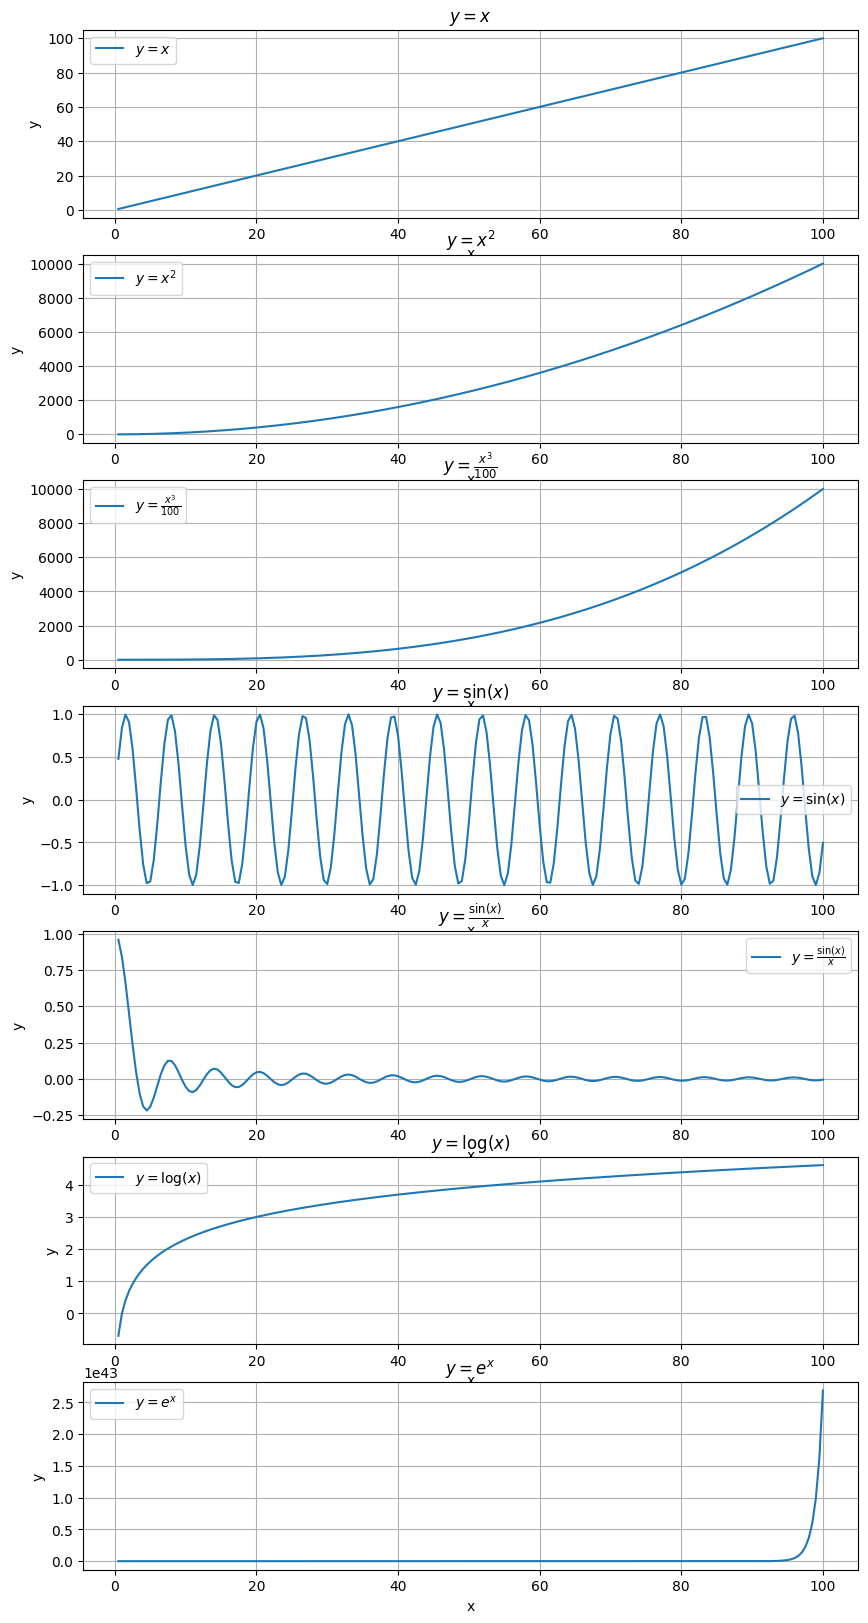

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

functions = [
    (x, x, r'$y = x$'),
    (x, x**2, r'$y = x^2$'),
    (x, (x**3) / 100, r'$y = \frac{x^3}{100}$'),
    (x, np.sin(x), r'$y = \sin(x)$'),
    (x, np.sin(x) / x, r'$y = \frac{\sin(x)}{x}$'),
    (x, np.log(x), r'$y = \log(x)$'),
    (x, np.exp(x), r'$y = e^x$')
]

fig, axes = plt.subplots(len(functions), 1, figsize=(10, 20))

for ax, (x, y, label) in zip(axes, functions):
    ax.plot(x, y, label=label)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(label)
    ax.legend()
    ax.grid(True)


plt.show()


**Que 10: Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [3]:
import numpy as np
import pandas as pd

np.random.seed(0)
matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

max_std_col = df.std().idxmax()
min_mean_row = df.mean(axis=1).idxmin()

print(df)
print("\nColumn with highest standard deviation:", max_std_col)
print("Row with lowest mean:", min_mean_row)


DataFrame:
           a         b         c         d         e
0   1.548814  1.715189  1.602763  1.544883  1.423655
1   1.645894  1.437587  1.891773  1.963663  1.383442
2   1.791725  1.528895  1.568045  1.925597  1.071036
3   1.087129  1.020218  1.832620  1.778157  1.870012
4   1.978618  1.799159  1.461479  1.780529  1.118274
5   1.639921  1.143353  1.944669  1.521848  1.414662
6   1.264556  1.774234  1.456150  1.568434  1.018790
7   1.617635  1.612096  1.616934  1.943748  1.681820
8   1.359508  1.437032  1.697631  1.060225  1.666767
9   1.670638  1.210383  1.128926  1.315428  1.363711
10  1.570197  1.438602  1.988374  1.102045  1.208877
11  1.161310  1.653108  1.253292  1.466311  1.244426
12  1.158970  1.110375  1.656330  1.138183  1.196582
13  1.368725  1.820993  1.097101  1.837945  1.096098
14  1.976459  1.468651  1.976761  1.604846  1.739264
15  1.039188  1.282807  1.120197  1.296140  1.118728
16  1.317983  1.414263  1.064147  1.692472  1.566601
17  1.265389  1.523248  1.093941  1

**Que 11: Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [8]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

lt8_count = df[df['g'] == 'LT8'].shape[0]

std_f_lt8 = df[df['g'] == 'LT8']['f'].std()
std_f_gt8 = df[df['g'] == 'GT8']['f'].std()

print(df)
print("\nNumber of rows where 'g' is 'LT8':", lt8_count)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_f_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_f_gt8)


           a         b         c         d         e         f    g
0   1.548814  1.715189  1.602763  1.544883  1.423655  7.835304  LT8
1   1.645894  1.437587  1.891773  1.963663  1.383442  8.322359  GT8
2   1.791725  1.528895  1.568045  1.925597  1.071036  7.885297  LT8
3   1.087129  1.020218  1.832620  1.778157  1.870012  7.588136  LT8
4   1.978618  1.799159  1.461479  1.780529  1.118274  8.138060  GT8
5   1.639921  1.143353  1.944669  1.521848  1.414662  7.664453  LT8
6   1.264556  1.774234  1.456150  1.568434  1.018790  7.082163  LT8
7   1.617635  1.612096  1.616934  1.943748  1.681820  8.472234  GT8
8   1.359508  1.437032  1.697631  1.060225  1.666767  7.221163  LT8
9   1.670638  1.210383  1.128926  1.315428  1.363711  6.689086  LT8
10  1.570197  1.438602  1.988374  1.102045  1.208877  7.308094  LT8
11  1.161310  1.653108  1.253292  1.466311  1.244426  6.778446  LT8
12  1.158970  1.110375  1.656330  1.138183  1.196582  6.260440  LT8
13  1.368725  1.820993  1.097101  1.837945  1.09

**Que 12: Write a small piece of code to explain broadcasting in numpy.**

In [13]:
import numpy as np

A = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

B = np.array([1, 0, 1])

result = A + B

print("Matrix:")
print(A)
print("\nVector:")
print(B)
print("\nResult of A + B:")
print(result)


Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Vector:
[1 0 1]

Result of A + B:
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


**Que 13: Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [36]:
import numpy as np

def custom_argmin(arr):
    if len(arr) == 0:
        raise ValueError("The input array cannot be empty")

    min_index = 0
    min_value = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

np.random.seed(20)
array = np.random.randint(1,100,(10,1)).flatten()
custom_result = custom_argmin(array)
numpy_result = np.argmin(array)

print("Array:", array)
print("Custom argmin result:", custom_result)
print("NumPy argmin result:", numpy_result)
print("Verification:", custom_result == numpy_result)


Array: [91 16 96 29 91 10 21 76 23 72]
Custom argmin result: 5
NumPy argmin result: 5
Verification: True
